# **Data Science Project:  Drinker Classification By Body Signal**
**Members:**
<br>1) Prateep Panyanontakarn (ID: 66199160164)
<br>2) Thanakrit Ploykate (ID : 66199160265)
<br><br>
**Meduim Link:** https://medium.com/@pt.panyanontakarn/drinker-classification-by-body-signal-70ab367f3044
<br><br>
**Machine Learning Model:** 1) K-Nearest Neighbors Classification 2) Logistic Regression <br>
**Dataset:** drinking_dataset.csv <br>
**Source:** https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset/data

## **Import Packages**


In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## **Import Dataset**

Import dataset (csv file) by using read_csv of Pandas and assign it to varaible which name is raw_data.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
strPath = "/content/drive/MyDrive/Data_Science_Final_Project/"

In [ ]:
raw = pd.read_csv(strPath+"drinking_dataset.csv")

## **Explore Data Analysis**

Detail of columns


*   sex [Male, Female]
*   age (round up to 5 years)
*   height (round up to 5 cm) [cm]
*   weight [kg]
*   waistline
*   sight_left (eyesight: left)
*   sight_right (eyesight: right)
*   hear_left (hearing: left) [1(normal), 2(abnormal)]
*   hear_right (hearing: right) [1(normal), 2(abnormal)]
*   SBP (Systolic blood pressure) [mmHg]
*   DBP (Diastolic blood pressure) [mmHg]
*   BLDS (BLDS or FSG(fasting blood glucose)) [mg/dL]
*   tot_chole (total cholesterol) [mg/dL]
*   HDL_chole (HDL cholesterol) [mg/dL]
*   LDL_chole (LDL cholesterol) [mg/dL]
*   triglyceride [mg/dL]
*   hemoglobin [g/dL]
*   urine_protein (protein in urine) [1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)]
*   serum_creatinine (serum(blood) creatinine) [mg/dL]
*   SGOT_AST (SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)) [IU/L]
*   SGOT_ALT (SGOT(Glutamate-oxaloacetate transaminase) ALT(Alanine transaminase)) [IU/L]
*   gamma_GTP (y-glutamyl transpeptidase) [IU/L]
*   SMK_stat_type_cd (Smoking state)[1(never), 2(used to smoke but quit), 3(still smoke)]
*   DRK_YN (Drinke or Not) [Y(yes), N(no)]












### 1. Clean Data

Check data and missing value

In [ ]:
raw.shape

(991346, 24)

In [ ]:
raw.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
raw['urine_protein'] = raw['urine_protein'].astype('int64')

In [ ]:
raw.isna().any()

sex                 False
age                 False
height              False
weight              False
waistline           False
sight_left          False
sight_right         False
hear_left           False
hear_right          False
SBP                 False
DBP                 False
BLDS                False
tot_chole           False
HDL_chole           False
LDL_chole           False
triglyceride        False
hemoglobin          False
urine_protein       False
serum_creatinine    False
SGOT_AST            False
SGOT_ALT            False
gamma_GTP           False
SMK_stat_type_cd    False
DRK_YN              False
dtype: bool

In [ ]:
raw.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Check duplicate data

In [ ]:
raw.duplicated().sum()

26

In [ ]:
raw.drop_duplicates(inplace=True)

In [ ]:
raw.shape

(991320, 24)

Change column's name for easy finding

In [ ]:
raw.rename(columns = {'SMK_stat_type_cd':'smoking_state','DRK_YN':'drinking_state'},inplace = True)

We found that this dataset has 991,346 rows, it is too large.
<br>
So we will reduce it to 50,000 instead by using sampling method.


In [ ]:
raw_data = resample(raw, n_samples=50000, replace=False, stratify=raw['drinking_state'],random_state=55)

In [ ]:
raw_data.reset_index(inplace=True)

In [ ]:
raw_data.drop(columns=['index'],inplace=True)

In [ ]:
raw_data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_state,drinking_state
0,Male,45,175,60,72.0,1.0,1.2,1.0,1.0,130.0,...,96.0,127.0,17.0,1,0.9,41.0,23.0,52.0,3.0,Y
1,Male,25,160,60,85.0,1.2,1.2,1.0,1.0,120.0,...,104.0,98.0,14.4,1,0.9,29.0,22.0,43.0,1.0,N
2,Female,65,150,50,75.0,0.2,0.8,1.0,1.0,112.0,...,180.0,52.0,13.4,3,0.7,31.0,45.0,43.0,1.0,N
3,Male,40,170,60,73.0,1.5,1.2,1.0,1.0,114.0,...,93.0,115.0,14.4,1,0.9,24.0,20.0,16.0,3.0,Y
4,Male,35,175,65,78.0,1.5,1.2,1.0,1.0,109.0,...,91.0,85.0,15.1,1,0.9,26.0,23.0,42.0,1.0,Y


In [ ]:
# recheck balance of dataset after sampling
raw_data['drinking_state'].describe()

count     50000
unique        2
top           N
freq      25009
Name: drinking_state, dtype: object

Data is ready to use for exploration.

### 2. Explore Data

We will explore data by each columns first.

### Overview

In [ ]:
# numeric data
raw_data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_state
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,47.742700,162.173100,63.223200,81.205430,0.977574,0.984794,1.031740,1.030800,122.468800,76.050640,...,56.927220,113.040380,132.089940,14.220850,1.096300,0.862640,25.989320,25.768480,36.86760,1.607220
std,14.235489,9.273449,12.517273,11.213222,0.581162,0.637248,0.175309,0.172777,14.580392,9.844857,...,14.857218,35.423193,101.898146,1.589171,0.441849,0.648526,18.388035,25.677639,49.60488,0.819535
min,20.000000,130.000000,30.000000,43.000000,0.100000,0.100000,1.000000,1.000000,76.000000,37.000000,...,2.000000,1.000000,9.000000,3.700000,1.000000,0.100000,1.000000,1.000000,1.00000,1.000000
25%,40.000000,155.000000,55.000000,74.200000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.00000,1.000000
50%,50.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.200000,1.000000,0.800000,23.000000,20.000000,23.00000,1.000000
75%,60.000000,170.000000,70.000000,87.900000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.00000,2.000000
max,85.000000,190.000000,135.000000,999.000000,9.900000,9.900000,2.000000,2.000000,241.000000,180.000000,...,222.000000,1660.000000,3848.000000,21.700000,6.000000,96.000000,1540.000000,2059.000000,999.00000,3.000000


In [ ]:
# object data
raw_data.describe(include='object')

,sex,drinking_state
count,50000,50000
unique,2,2
top,Male,N
freq,26541,25009


In [ ]:
raw_data.corr()

<ipython-input-22-6e5ccd0fb62a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_state
age,1.000000,-0.399344,-0.198496,0.130988,-0.183841,-0.155063,0.206666,0.202082,0.266228,0.107906,...,-0.125064,0.021172,0.048054,-0.171787,0.045069,0.014517,0.071020,-0.027397,0.016388,-0.124935
height,-0.399344,1.000000,0.668344,0.280805,0.152222,0.127615,-0.075891,-0.081907,0.027928,0.104211,...,-0.167812,-0.009504,0.131917,0.532135,0.005157,0.133245,0.054936,0.152511,0.163172,0.466153
weight,-0.198496,0.668344,1.000000,0.674222,0.102312,0.082769,-0.045209,-0.047106,0.243863,0.275857,...,-0.327652,0.066301,0.280701,0.501652,0.039581,0.119653,0.136829,0.292456,0.225251,0.363966
waistline,0.130988,0.280805,0.674222,1.000000,0.012380,0.010262,0.037168,0.034298,0.285986,0.255255,...,-0.309798,0.063128,0.262762,0.310964,0.054515,0.076563,0.138098,0.236502,0.200393,0.217250
sight_left,-0.183841,0.152222,0.102312,0.012380,1.000000,0.274225,-0.037261,-0.038933,-0.032678,0.000316,...,-0.004944,0.001566,0.011106,0.095878,-0.016654,0.019174,-0.007894,0.023690,0.016659,0.071609
sight_right,-0.155063,0.127615,0.082769,0.010262,0.274225,1.000000,-0.041171,-0.042159,-0.029784,0.002904,...,-0.011942,0.000542,0.014077,0.078262,-0.006477,0.015148,-0.003912,0.018743,0.018253,0.066130
hear_left,0.206666,-0.075891,-0.045209,0.037168,-0.037261,-0.041171,1.000000,0.523706,0.054953,0.005732,...,-0.039527,-0.019869,0.003557,-0.040151,0.028189,0.014212,0.015467,-0.009737,0.006245,-0.018467
hear_right,0.202082,-0.081907,-0.047106,0.034298,-0.038933,-0.042159,0.523706,1.000000,0.053249,0.000706,...,-0.033705,-0.020340,0.003481,-0.039685,0.031621,0.009591,0.008841,-0.013017,0.002865,-0.021345
SBP,0.266228,0.027928,0.243863,0.285986,-0.032678,-0.029784,0.054953,0.053249,1.000000,0.737682,...,-0.128684,0.034084,0.183557,0.161543,0.071233,0.045836,0.107133,0.118228,0.161880,0.083852
DBP,0.107906,0.104211,0.275857,0.255255,0.000316,0.002904,0.005732,0.000706,0.737682,1.000000,...,-0.107040,0.071640,0.199619,0.241768,0.051363,0.041507,0.101710,0.134108,0.175707,0.131728


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>,
        <Axes: title={'center': 'sight_left'}>],
       [<Axes: title={'center': 'sight_right'}>,
        <Axes: title={'center': 'hear_left'}>,
        <Axes: title={'center': 'hear_right'}>,
        <Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'DBP'}>],
       [<Axes: title={'center': 'BLDS'}>,
        <Axes: title={'center': 'tot_chole'}>,
        <Axes: title={'center': 'HDL_chole'}>,
        <Axes: title={'center': 'LDL_chole'}>,
        <Axes: title={'center': 'triglyceride'}>],
       [<Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'urine_protein'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'SGOT_AST'}>,
        <Axes: title={'center': 'SGOT_ALT'}>],
       [<Axes: title={'center': 'gamma_GTP'}>,
        <Axes: title={'center

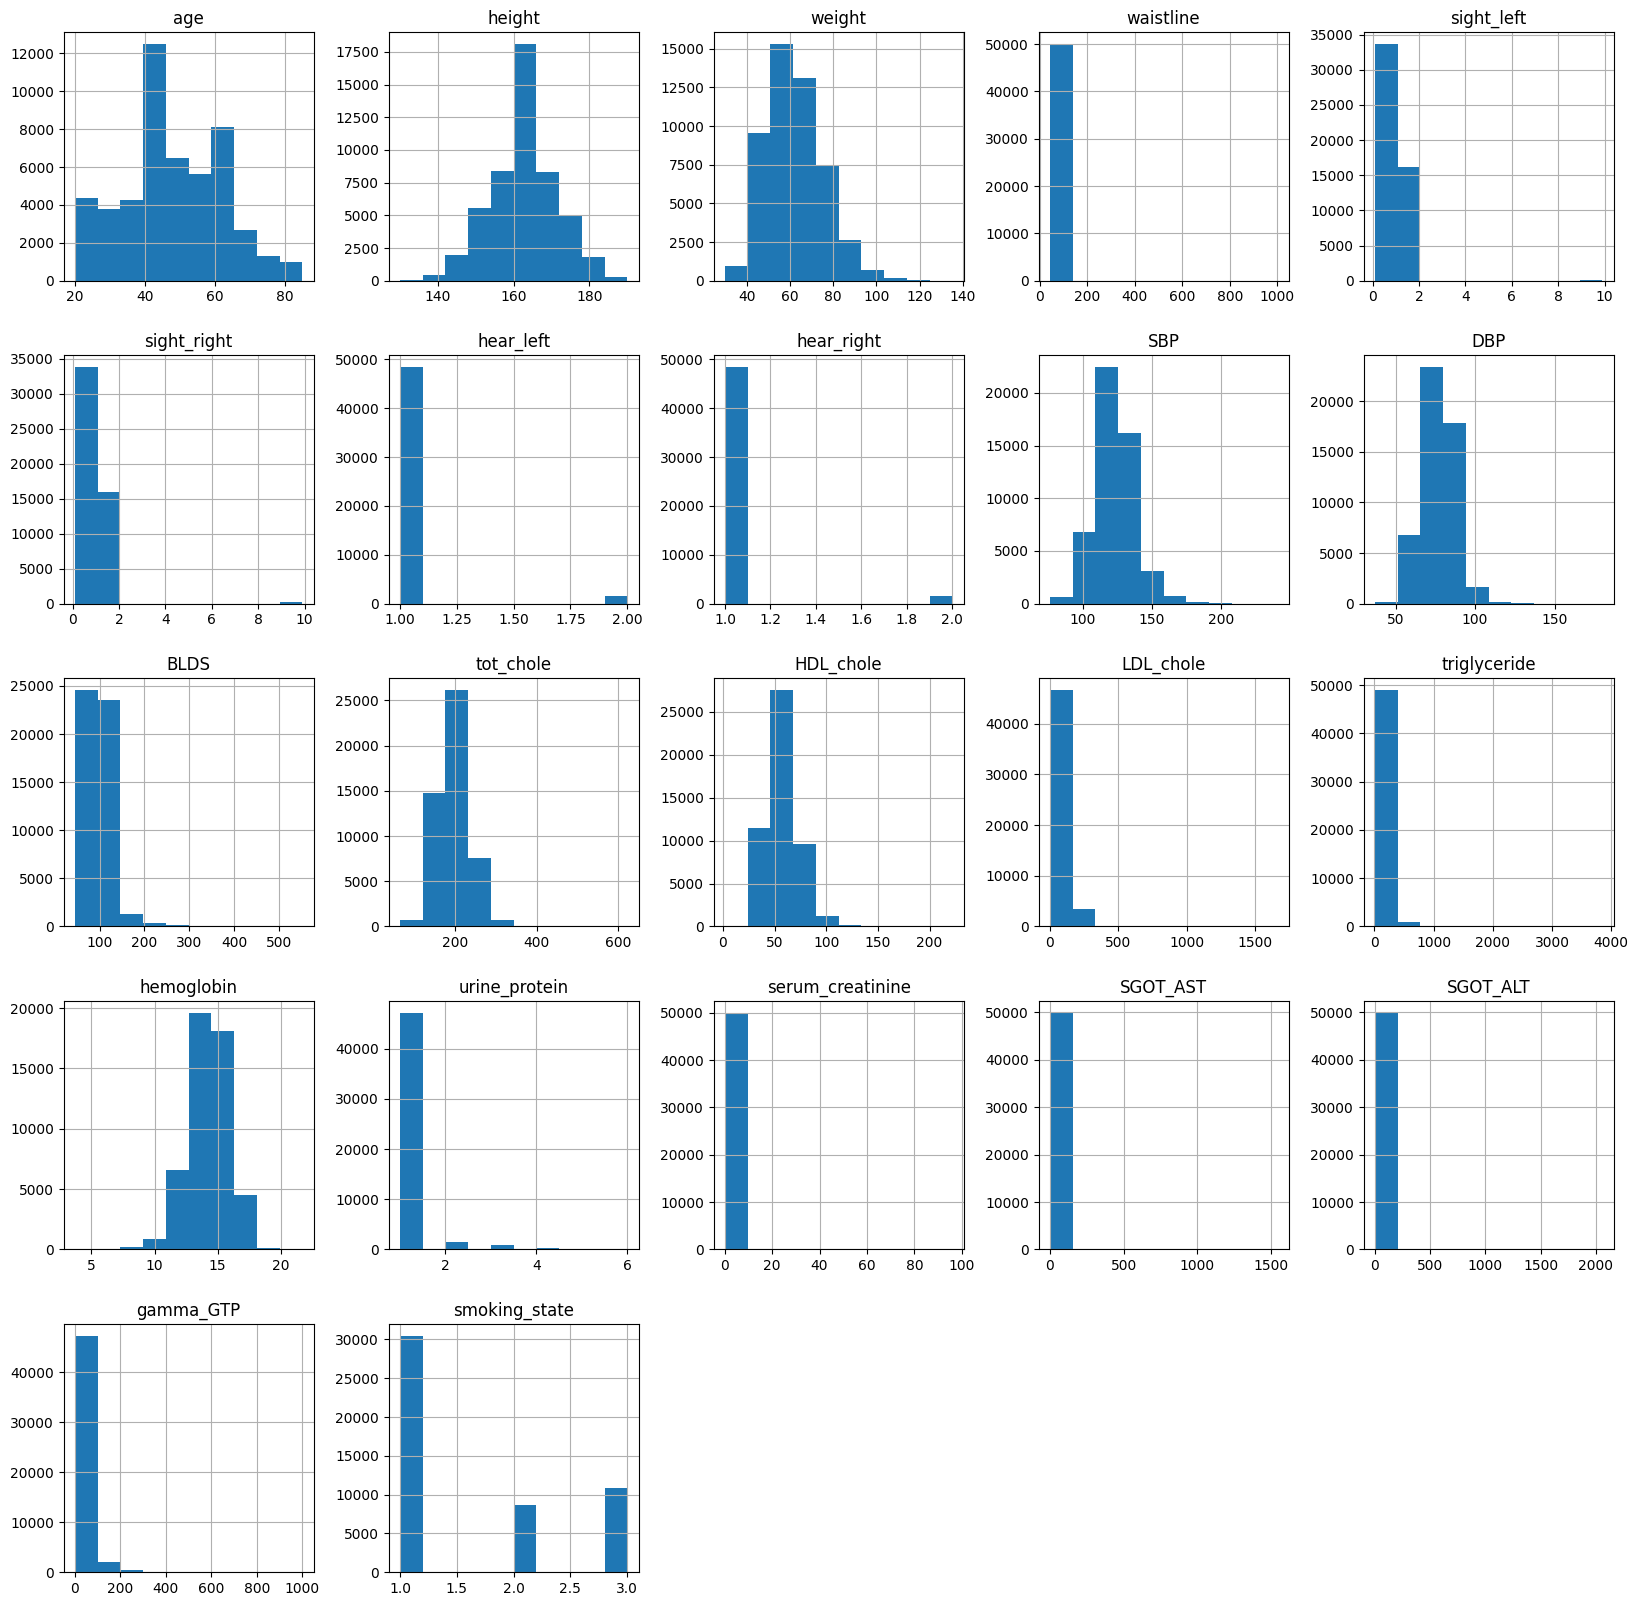

In [ ]:
# view distribution of each columns
raw_data.hist(figsize=(20,20))

<ipython-input-24-99eca3f9efc3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(),annot=True,fmt=".2f",linewidth=.5)


<Axes: >

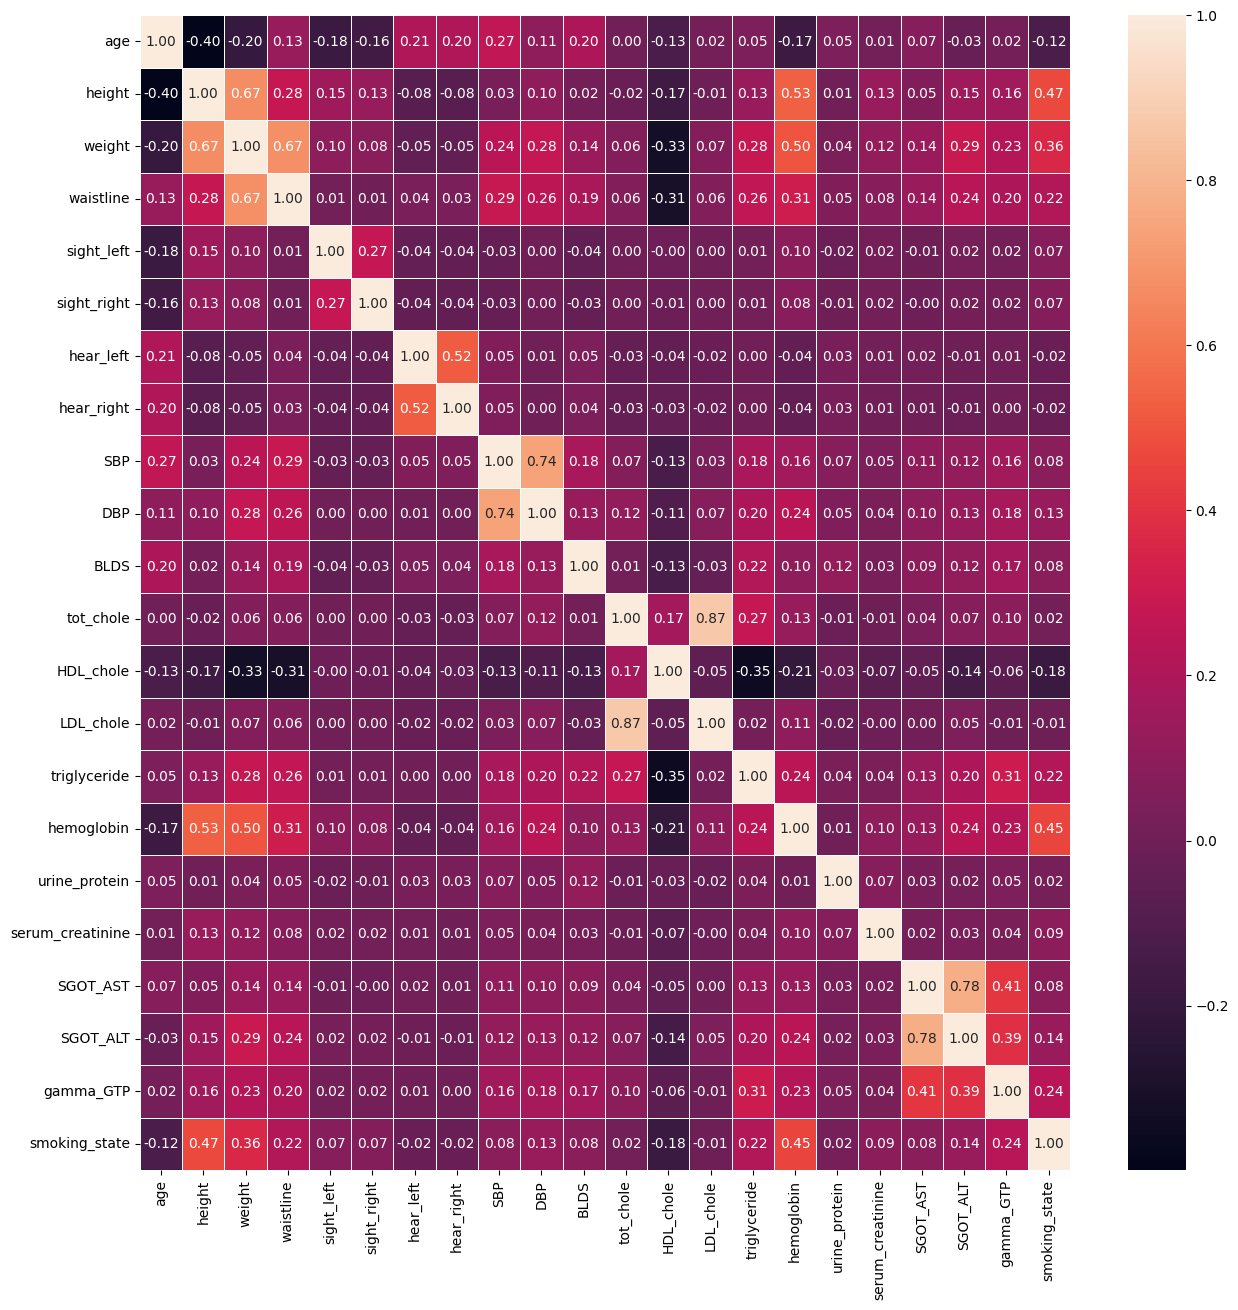

In [ ]:
plt.figure(figsize = (15,15))

sns.heatmap(raw_data.corr(),annot=True,fmt=".2f",linewidth=.5)




*   LDL_chole has the high positive correlation with total_chole(0.87).

*   SBP havs the high positive correlation with DBP(0.74).

*   weigh has the moderate positive correlation with height(0.67) and waistline(0.67).

*   SGOT_AST has the moderate positive correlation with SGOT_ALT(0.78).

*   hemoglobin has the moderate positive correlation with height(0.53) and weight(0.50).


*   hear_left has the moderate positive correlation with hear_right(0.52).

*   smoking_state has the low positive correlation with height(0.47), weight(0.36), and hemoglobin(0.45)



*    gamma_GTP has the low positive correlation with SGOT_AST(0.41) and SGOT_ALT(0.39)



### 1. Sex

In [ ]:
print(raw_data.sex.describe())
print('-------------------------------\n')
print(raw_data.sex.value_counts())

count     50000
unique        2
top        Male
freq      26541
Name: sex, dtype: object
-------------------------------

Male      26541
Female    23459
Name: sex, dtype: int64


In [ ]:
print(pd.crosstab(raw_data.sex, raw_data.drinking_state, margins = True))
print('--------------------------------------------------------------\n')
print(pd.crosstab(raw_data.sex, raw_data.drinking_state, margins = True, normalize = 'all'))

drinking_state      N      Y    All
sex                                
Female          16300   7159  23459
Male             8709  17832  26541
All             25009  24991  50000
--------------------------------------------------------------

drinking_state        N        Y      All
sex                                      
Female          0.32600  0.14318  0.46918
Male            0.17418  0.35664  0.53082
All             0.50018  0.49982  1.00000


<Axes: xlabel='sex', ylabel='Count'>

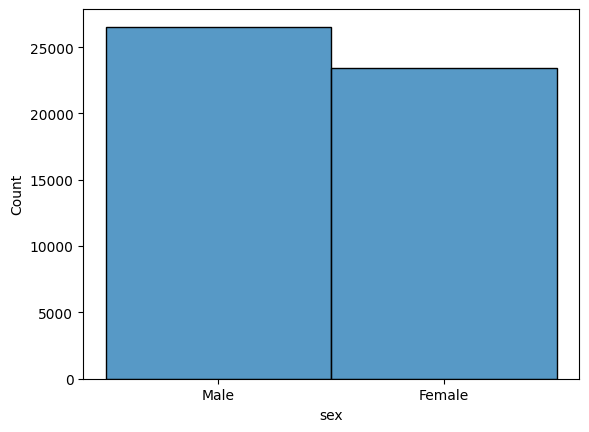

In [ ]:
sns.histplot(raw_data['sex'])

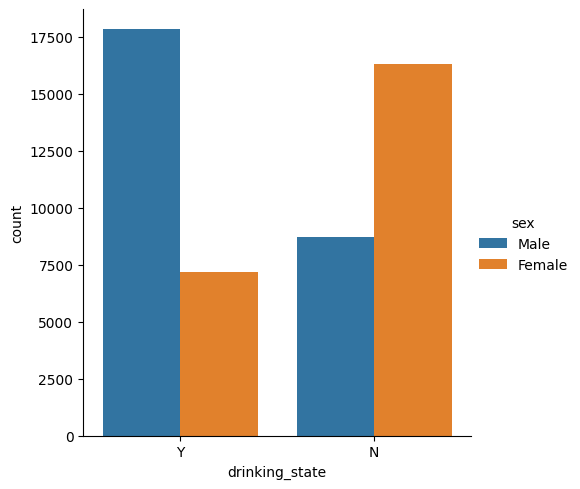

In [ ]:
sns.catplot(data=raw_data,x='drinking_state',hue='sex',kind='count')

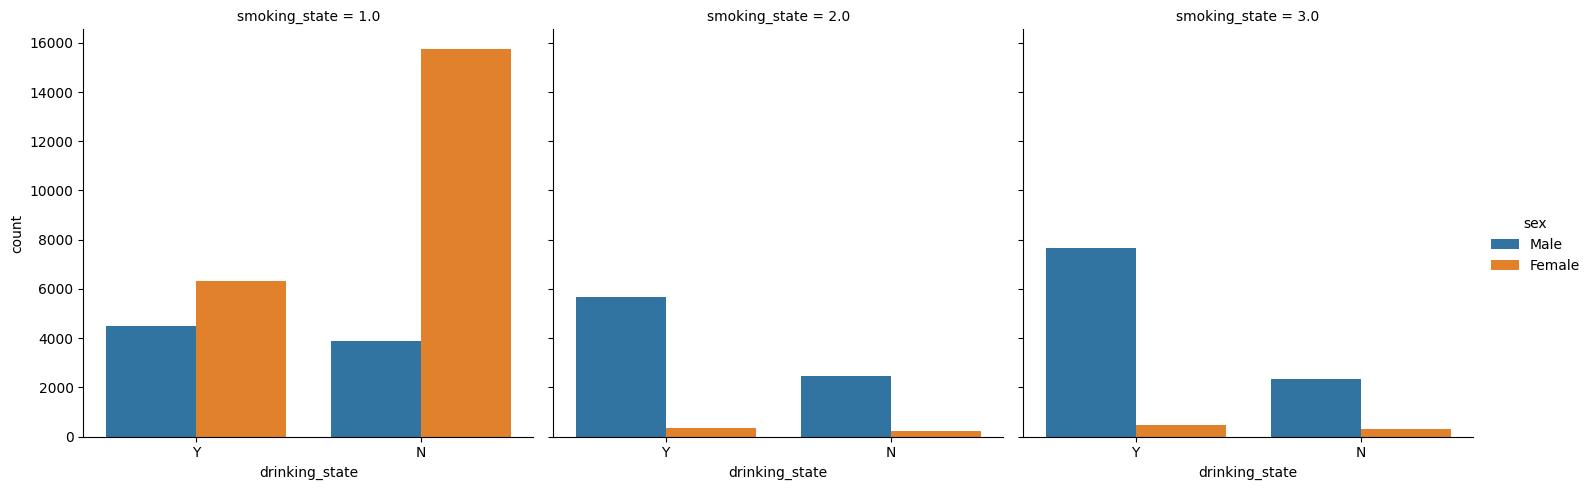

In [ ]:
sns.catplot(data=raw_data,x='drinking_state',hue='sex',col='smoking_state',kind='count')


*   49.98% of sample is drinker separate by 35.62% is male and 14.36% is female.










### 2. Age

In [ ]:
print(raw_data.age.describe())
print('-------------------------------\n')
print(raw_data.age.value_counts())

count    50000.000000
mean        47.742700
std         14.235489
min         20.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         85.000000
Name: age, dtype: float64
-------------------------------

40    6585
50    6457
45    5908
55    5608
60    5467
35    4275
30    3770
25    3285
70    2650
65    2645
75    1283
20    1102
80     800
85     165
Name: age, dtype: int64


In [ ]:
eda_age = raw_data[['age','drinking_state']].reset_index()
eda_age.drop(columns=['index'],inplace=True)

eda_age.loc[(eda_age['age'] >= 20) & (eda_age['age'] <= 30), 'label'] = '20-30'
eda_age.loc[(eda_age['age'] >= 31) & (eda_age['age'] <= 40), 'label'] = '31-40'
eda_age.loc[(eda_age['age'] >= 41) & (eda_age['age'] <= 50), 'label'] = '41-50'
eda_age.loc[(eda_age['age'] >= 51) & (eda_age['age'] <= 60), 'label'] = '51-60'
eda_age.loc[eda_age['age'] > 60, 'label'] = 'more than 60'

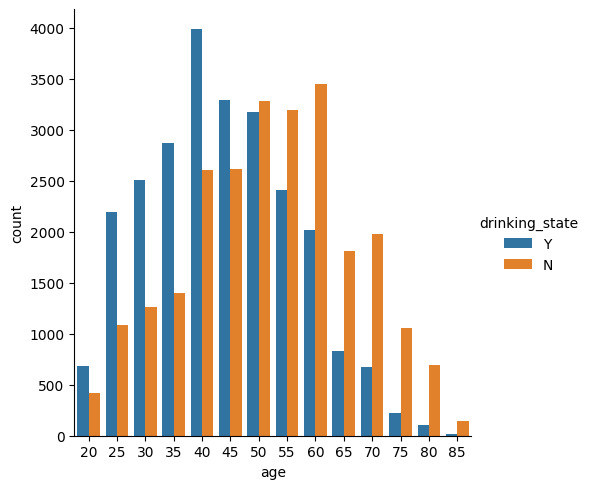

In [ ]:
sns.catplot(data=eda_age,x='age',hue='drinking_state',kind='count')

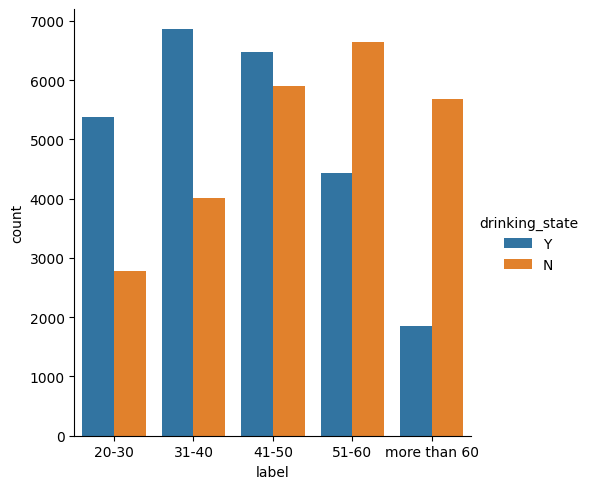

In [ ]:
sns.catplot(data=eda_age,x='label',hue='drinking_state',kind='count',order=['20-30','31-40','41-50','51-60','more than 60'])



*   Age which is between 31 to 40 is the highest amount of drinker and the lowest is age more than 60.






### 3. Height

In [ ]:
print(raw_data.height.describe())
print('-------------------------------\n')
print(raw_data.height.value_counts())

count    50000.000000
mean       162.173100
std          9.273449
min        130.000000
25%        155.000000
50%        160.000000
75%        170.000000
max        190.000000
Name: height, dtype: float64
-------------------------------

160    9171
165    8921
155    8377
170    8340
150    5592
175    4979
145    1997
180    1804
140     442
185     293
135      60
190      23
130       1
Name: height, dtype: int64


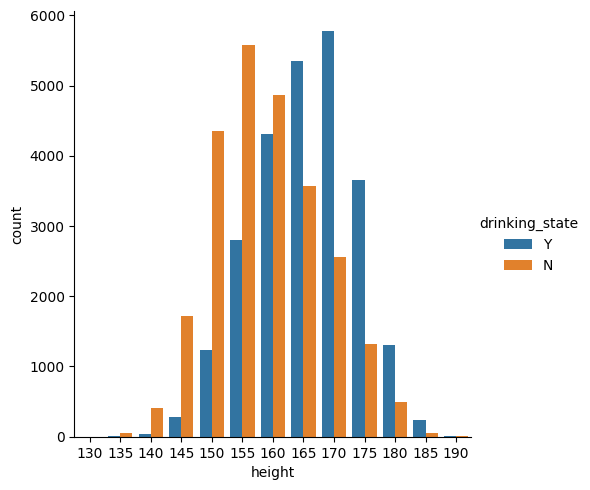

In [ ]:
sns.catplot(data=raw_data,x='height',hue='drinking_state',kind='count')



*   Most of drinker high between 160-175 cm.

*   Most of not drinker high between 150-160 cm.





### 4. Weight

In [ ]:
print(raw_data.weight.describe())
print('-------------------------------\n')
print(raw_data.weight.value_counts())

count    50000.000000
mean        63.223200
std         12.517273
min         30.000000
25%         55.000000
50%         60.000000
75%         70.000000
max        135.000000
Name: weight, dtype: float64
-------------------------------

60     7682
55     7626
65     7095
50     6304
70     6023
75     4535
45     3246
80     2981
85     1660
90      966
40      844
95      472
100     222
105     134
35      103
110      53
115      36
120       7
30        6
125       3
135       2
Name: weight, dtype: int64


<Figure size 4000x4000 with 0 Axes>

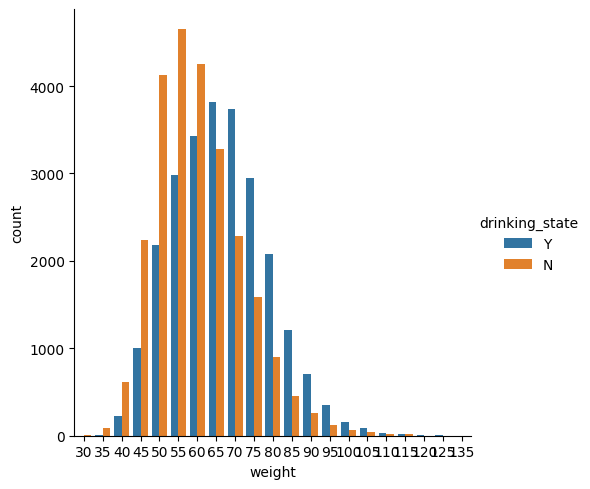

In [ ]:
plt.figure(figsize = (40,40))
sns.catplot(data=raw_data,x='weight',hue='drinking_state',kind='count')


*   Drinker weight is between 60 to 70 kg.
*   Not drinker weight is between 50 to 60 kg.




### 5. Waistline

In [ ]:
print(raw_data.waistline.describe())
print('-------------------------------\n')
print(raw_data.waistline.value_counts())

count    50000.000000
mean        81.205430
std         11.213222
min         43.000000
25%         74.200000
50%         81.000000
75%         87.900000
max        999.000000
Name: waistline, dtype: float64
-------------------------------

80.0     1942
82.0     1745
81.0     1741
84.0     1662
83.0     1629
         ... 
62.6        1
106.7       1
121.0       1
52.0        1
106.3       1
Name: waistline, Length: 548, dtype: int64


<Axes: xlabel='waistline'>

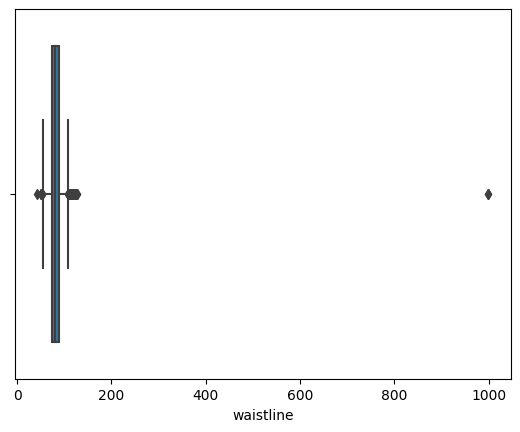

In [ ]:
sns.boxplot(data=raw_data,x='waistline')

In [ ]:
raw_data[raw_data.waistline == 999]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_state,drinking_state
21369,Female,25,155,50,999.0,1.0,1.2,1.0,1.0,118.0,...,128.0,175.0,12.2,1,0.6,18.0,11.0,9.0,1.0,N
29075,Female,25,165,70,999.0,0.2,0.2,1.0,1.0,119.0,...,135.0,190.0,11.9,1,0.4,22.0,11.0,8.0,1.0,N


ฺBecause we do not sure about its measurement, so we decide to delete this column.

In [ ]:
raw_data.drop(columns='waistline',inplace=True)

### 6. Sight_left

In [ ]:
print(raw_data.sight_left.describe())
print('-------------------------------\n')
print(raw_data.sight_left[raw_data.drinking_state == 'Y'].value_counts().head(3))
print('-------------------------------\n')
print(raw_data.sight_left[raw_data.drinking_state == 'N'].value_counts().head(3))

count    50000.000000
mean         0.977574
std          0.581162
min          0.100000
25%          0.700000
50%          1.000000
75%          1.200000
max          9.900000
Name: sight_left, dtype: float64
-------------------------------

1.2    5610
1.0    5295
1.5    3771
Name: sight_left, dtype: int64
-------------------------------

1.0    4763
1.2    4033
0.9    2755
Name: sight_left, dtype: int64


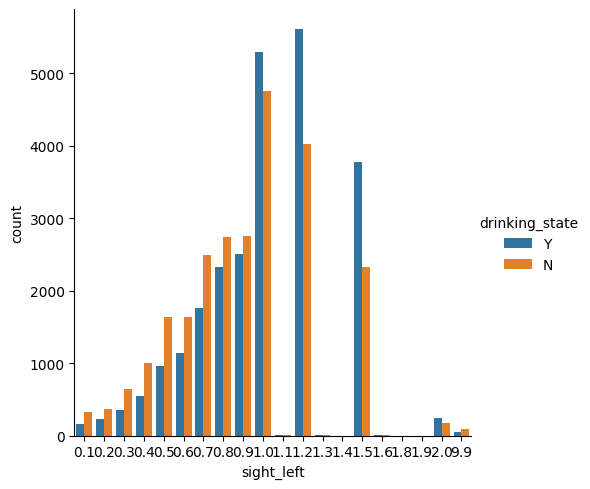

In [ ]:
sns.catplot(data=raw_data,x='sight_left',hue='drinking_state',kind='count')

### 7. Sight_right

In [ ]:
print(raw_data.sight_right.describe())
print('-------------------------------\n')
print(raw_data.sight_right[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.sight_right[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean         0.984794
std          0.637248
min          0.100000
25%          0.700000
50%          1.000000
75%          1.200000
max          9.900000
Name: sight_right, dtype: float64
-------------------------------

1.2    5483
1.0    5440
1.5    3750
0.9    2543
0.8    2299
0.7    1795
0.6    1105
0.5     942
0.4     567
0.3     347
0.2     236
2.0     232
0.1     152
9.9      74
1.6      11
1.3       8
1.1       4
1.4       2
1.8       1
Name: sight_right, dtype: int64
-------------------------------

1.0    4888
1.2    3995
0.8    2772
0.9    2753
0.7    2438
1.5    2381
0.5    1582
0.6    1569
0.4     999
0.3     656
0.2     387
0.1     335
2.0     119
9.9     109
1.1       7
1.6       6
1.3       4
1.4       4
1.8       2
2.1       2
1.7       1
Name: sight_right, dtype: int64


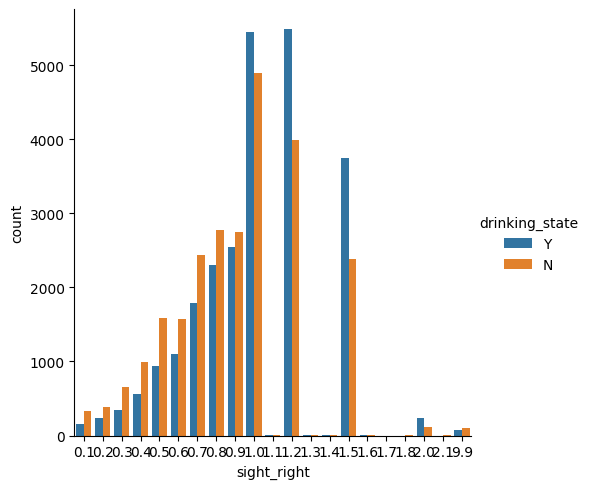

In [ ]:
sns.catplot(data=raw_data,x='sight_right',hue='drinking_state',kind='count')



*   Most of drinker have eye sight around 1.2 and not drinker is aound 1.0.



### 8. Hear_left

In [ ]:
print(raw_data.hear_left.describe())
print('-------------------------------\n')
print(raw_data.hear_left.value_counts())

count    50000.000000
mean         1.031740
std          0.175309
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hear_left, dtype: float64
-------------------------------

1.0    48413
2.0     1587
Name: hear_left, dtype: int64


In [ ]:
pd.crosstab(raw_data.hear_left,raw_data.drinking_state)

drinking_state,N,Y
hear_left,,
1.0,23983,24430
2.0,1026,561


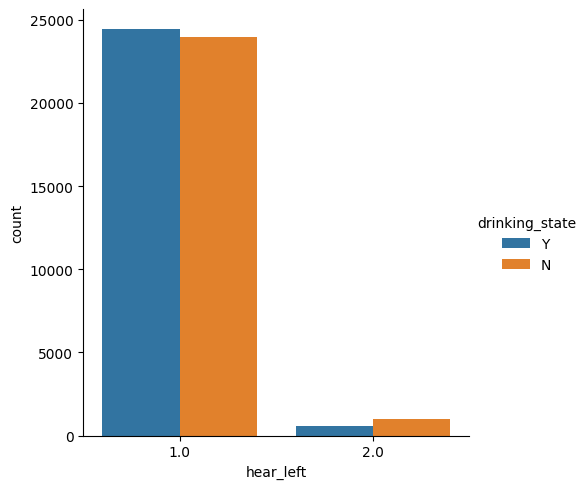

In [ ]:
sns.catplot(data=raw_data,x='hear_left',hue='drinking_state',kind='count')

### 9. Hear_right

In [ ]:
print(raw_data.hear_right.describe())
print('-------------------------------\n')
print(raw_data.hear_right.value_counts())

count    50000.000000
mean         1.030800
std          0.172777
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hear_right, dtype: float64
-------------------------------

1.0    48460
2.0     1540
Name: hear_right, dtype: int64


In [ ]:
pd.crosstab(raw_data.hear_right,raw_data.drinking_state)

drinking_state,N,Y
hear_right,,
1.0,24013,24447
2.0,996,544


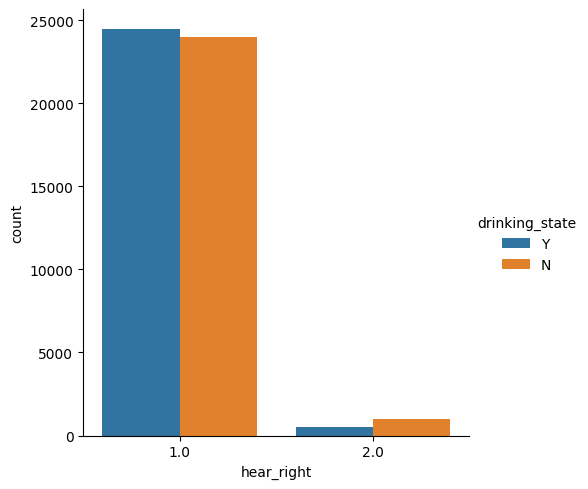

In [ ]:
sns.catplot(data=raw_data,x='hear_right',hue='drinking_state',kind='count')



*   Both of hear_left and right seems to not relation to drinking because drinker hears normal as not drinker.
*   Moreover not drinker has higher rate at abnormal hearing than drinker.



### 10. SBP (Systolic blood pressure)

In [ ]:
print(raw_data.SBP.describe())
print('-------------------------------\n')
print(raw_data.SBP[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.SBP[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean       122.468800
std         14.580392
min         76.000000
25%        112.000000
50%        120.000000
75%        131.000000
max        241.000000
Name: SBP, dtype: float64
-------------------------------

120.0    2053
130.0    1910
110.0    1852
118.0    1068
138.0     680
         ... 
185.0       1
196.0       1
186.0       1
202.0       1
216.0       1
Name: SBP, Length: 120, dtype: int64
-------------------------------

120.0    1930
110.0    1803
130.0    1793
118.0     936
100.0     825
         ... 
195.0       1
82.0        1
188.0       1
182.0       1
78.0        1
Name: SBP, Length: 121, dtype: int64


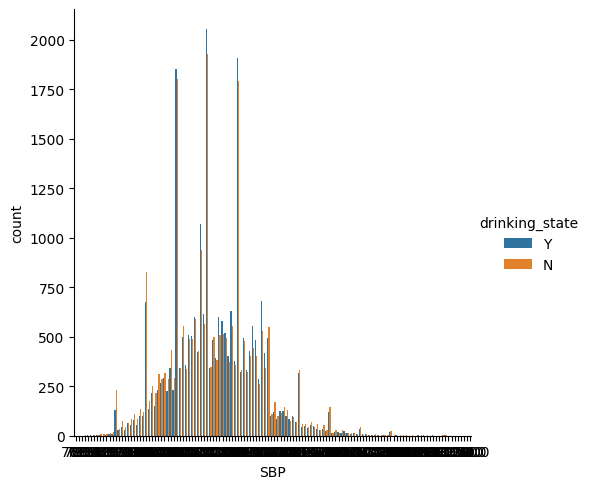

In [ ]:
sns.catplot(data=raw_data,x='SBP',hue='drinking_state',kind='count')

### 11. DBP (Diastolic blood pressure)

In [ ]:
print(raw_data.DBP.describe())
print('-------------------------------\n')
print(raw_data.DBP[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.DBP[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean        76.050640
std          9.844857
min         37.000000
25%         70.000000
50%         76.000000
75%         82.000000
max        180.000000
Name: DBP, dtype: float64
-------------------------------

80.0     3187
70.0     2748
78.0     1163
76.0      848
60.0      821
         ... 
48.0        1
150.0       1
45.0        1
129.0       1
143.0       1
Name: DBP, Length: 90, dtype: int64
-------------------------------

80.0     3002
70.0     2878
60.0     1176
78.0     1039
72.0      908
         ... 
49.0        1
118.0       1
122.0       1
121.0       1
180.0       1
Name: DBP, Length: 79, dtype: int64


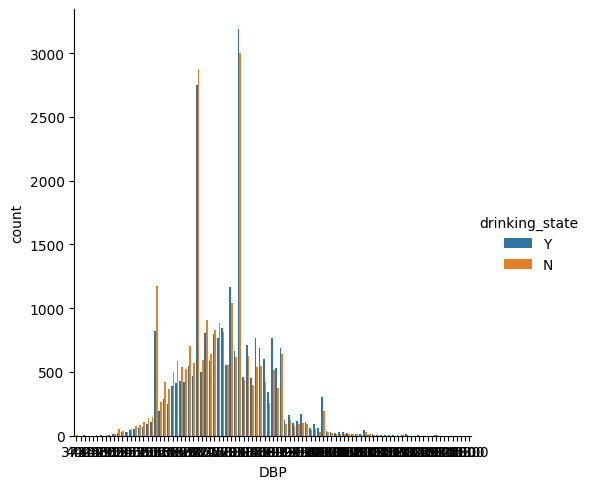

In [ ]:
sns.catplot(data=raw_data,x='DBP',hue='drinking_state',kind='count')

### 12. BLDS (BLDS or FSG(fasting blood glucose))

In [ ]:
print(raw_data.BLDS.describe())
print('-------------------------------\n')
print(raw_data.BLDS[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.BLDS[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean       100.559460
std         24.381563
min         45.000000
25%         89.000000
50%         96.000000
75%        105.000000
max        552.000000
Name: BLDS, dtype: float64
-------------------------------

94.0     906
96.0     902
93.0     897
91.0     859
97.0     853
        ... 
305.0      1
47.0       1
238.0      1
247.0      1
328.0      1
Name: BLDS, Length: 262, dtype: int64
-------------------------------

95.0     920
90.0     911
94.0     903
91.0     888
93.0     878
        ... 
280.0      1
51.0       1
45.0       1
318.0      1
278.0      1
Name: BLDS, Length: 261, dtype: int64


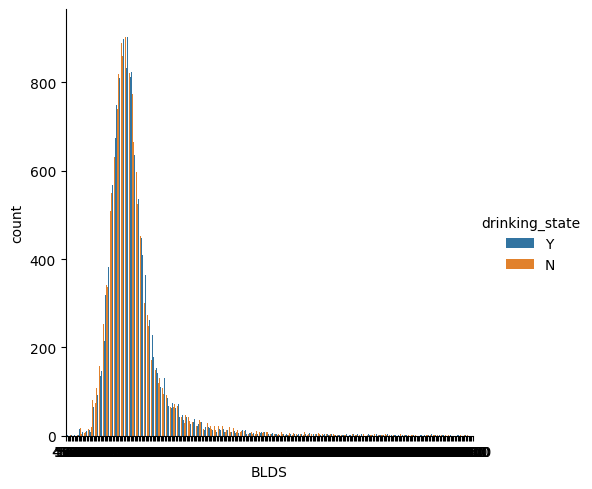

In [ ]:
sns.catplot(data=raw_data,x='BLDS',hue='drinking_state',kind='count')



*   Drinker seems to have BLDS higher than not drinker (Drinker's BLDS: 92-96).



### 13. Tot_chole (total cholesterol)

In [ ]:
print(raw_data.tot_chole.describe())
print('-------------------------------\n')
print(raw_data.tot_chole[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.tot_chole[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean       195.543500
std         38.220039
min         64.000000
25%        169.000000
50%        193.000000
75%        219.000000
max        623.000000
Name: tot_chole, dtype: float64
-------------------------------

196.0    323
180.0    297
190.0    294
192.0    293
179.0    292
        ... 
346.0      1
74.0       1
328.0      1
508.0      1
363.0      1
Name: tot_chole, Length: 287, dtype: int64
-------------------------------

181.0    300
199.0    286
194.0    278
196.0    276
198.0    271
        ... 
356.0      1
341.0      1
329.0      1
77.0       1
355.0      1
Name: tot_chole, Length: 285, dtype: int64


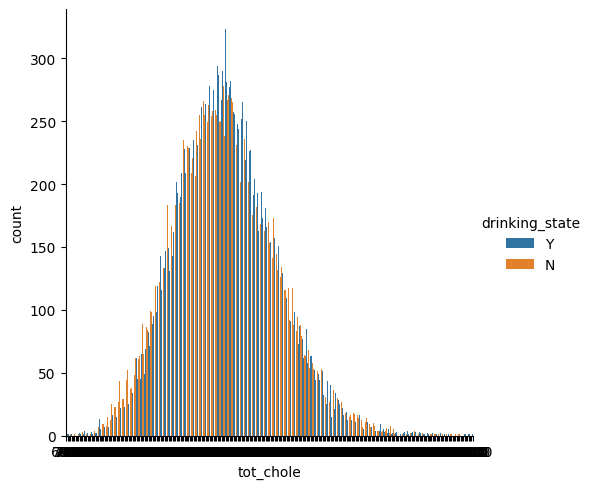

In [ ]:
sns.catplot(data=raw_data,x='tot_chole',hue='drinking_state',kind='count')

### 14. HDL_chole (HDL cholesterol)

In [ ]:
print(raw_data.HDL_chole.describe())
print('-------------------------------\n')
print(raw_data.HDL_chole[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.HDL_chole[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean        56.927220
std         14.857218
min          2.000000
25%         46.000000
50%         55.000000
75%         66.000000
max        222.000000
Name: HDL_chole, dtype: float64
-------------------------------

50.0     747
52.0     739
49.0     717
53.0     716
55.0     715
        ... 
151.0      1
130.0      1
187.0      1
16.0       1
138.0      1
Name: HDL_chole, Length: 129, dtype: int64
-------------------------------

51.0     753
52.0     750
50.0     731
49.0     727
54.0     724
        ... 
127.0      1
2.0        1
129.0      1
136.0      1
114.0      1
Name: HDL_chole, Length: 111, dtype: int64


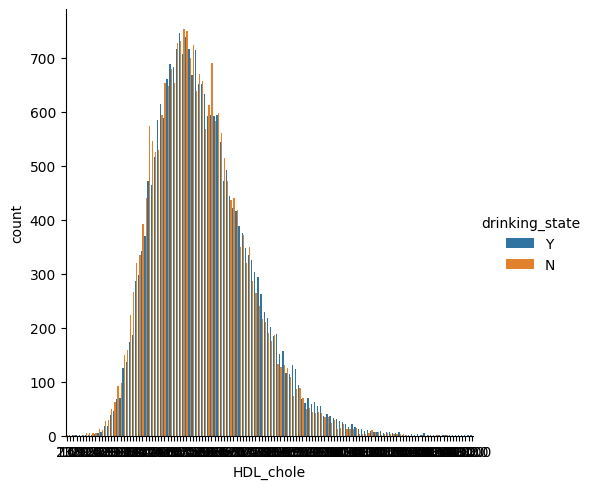

In [ ]:
sns.catplot(data=raw_data,x='HDL_chole',hue='drinking_state',kind='count')

### 15. LDL_chole (LDL cholesterol)

In [ ]:
print(raw_data.LDL_chole.describe())
print('-------------------------------\n')
print(raw_data.LDL_chole[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.LDL_chole[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean       113.040380
std         35.423193
min          1.000000
25%         89.000000
50%        111.000000
75%        135.000000
max       1660.000000
Name: LDL_chole, dtype: float64
-------------------------------

104.0    325
110.0    324
106.0    322
114.0    314
103.0    309
        ... 
224.0      1
255.0      1
298.0      1
581.0      1
264.0      1
Name: LDL_chole, Length: 258, dtype: int64
-------------------------------

109.0    329
120.0    324
113.0    323
105.0    312
108.0    303
        ... 
238.0      1
401.0      1
297.0      1
250.0      1
6.0        1
Name: LDL_chole, Length: 257, dtype: int64


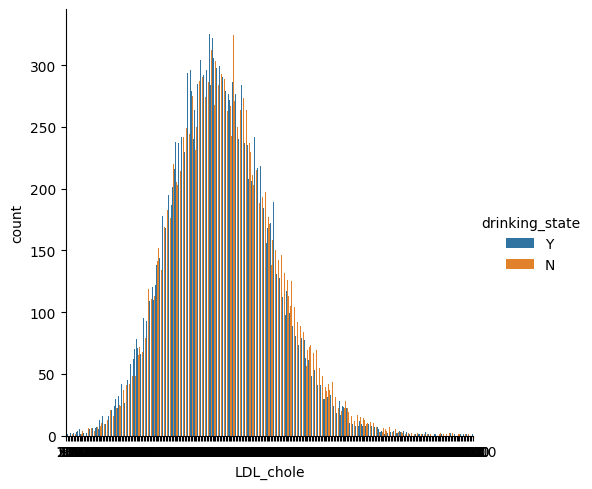

In [ ]:
sns.catplot(data=raw_data,x='LDL_chole',hue='drinking_state',kind='count')

### 16. Triglyceride

In [ ]:
print(raw_data.triglyceride.describe())
print('-------------------------------\n')
print(raw_data.triglyceride[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.triglyceride[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean       132.089940
std        101.898146
min          9.000000
25%         74.000000
50%        106.000000
75%        159.000000
max       3848.000000
Name: triglyceride, dtype: float64
-------------------------------

78.0      220
76.0      212
92.0      208
95.0      205
83.0      204
         ... 
696.0       1
1720.0      1
458.0       1
2057.0      1
834.0       1
Name: triglyceride, Length: 740, dtype: int64
-------------------------------

72.0     253
66.0     244
67.0     239
70.0     238
87.0     238
        ... 
656.0      1
471.0      1
957.0      1
449.0      1
12.0       1
Name: triglyceride, Length: 556, dtype: int64


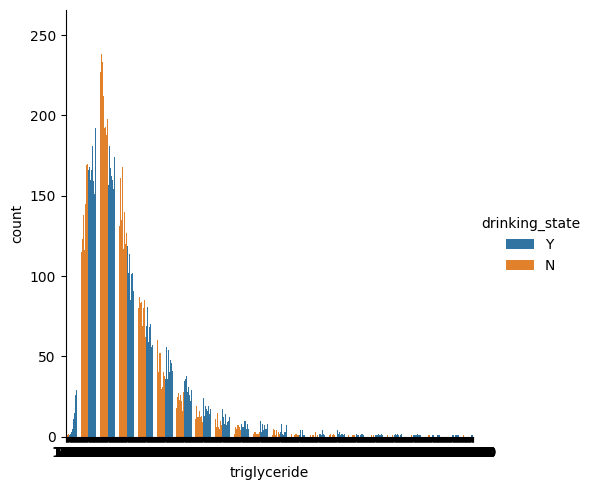

In [ ]:
sns.catplot(data=raw_data,x='triglyceride',hue='drinking_state',kind='count')

Some of not drinker has triglyceride higher than drinker at 82 but the rest seems to less than drinker.

### 17. Hemoglobin

In [ ]:
print(raw_data.hemoglobin.describe())
print('-------------------------------\n')
print(raw_data.hemoglobin[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.hemoglobin[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean        14.220850
std          1.589171
min          3.700000
25%         13.200000
50%         14.200000
75%         15.400000
max         21.700000
Name: hemoglobin, dtype: float64
-------------------------------

15.3    732
15.1    722
15.4    704
15.6    704
15.2    697
       ... 
7.1       1
4.3       1
7.4       1
19.3      1
7.5       1
Name: hemoglobin, Length: 125, dtype: int64
-------------------------------

13.4    775
13.1    746
13.5    735
13.7    727
13.2    717
       ... 
19.4      1
6.5       1
21.7      1
20.0      1
4.8       1
Name: hemoglobin, Length: 139, dtype: int64


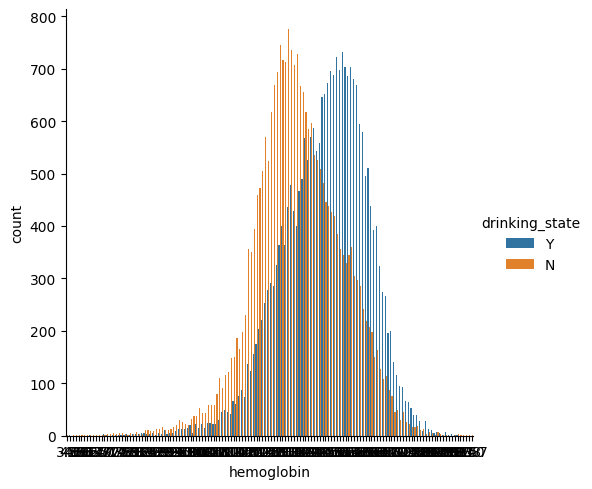

In [ ]:
sns.catplot(data=raw_data,x='hemoglobin',hue='drinking_state',kind='count')


*   Drinker has hemoglobin around 15 - 15.5 higher that not drinker.



### 18. Urine_protein (Protein in urine)

In [ ]:
print(raw_data.urine_protein.describe())
print('-------------------------------\n')
print(raw_data.urine_protein[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.urine_protein[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean         1.096300
std          0.441849
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: urine_protein, dtype: float64
-------------------------------

1    23534
2      824
3      423
4      152
5       48
6       10
Name: urine_protein, dtype: int64
-------------------------------

1    23581
2      738
3      438
4      188
5       51
6       13
Name: urine_protein, dtype: int64


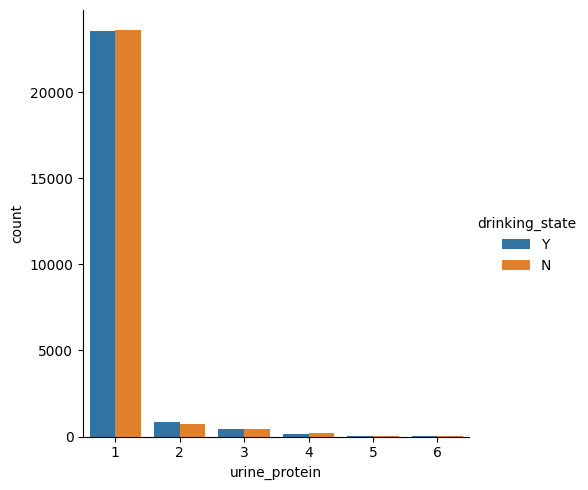

In [ ]:
sns.catplot(data=raw_data,x='urine_protein',hue='drinking_state',kind='count')

### 19. Serum_creatinine (Serum(blood) creatinine)

In [ ]:
print(raw_data.serum_creatinine.describe())
print('-------------------------------\n')
print(raw_data.serum_creatinine[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.serum_creatinine[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean         0.862640
std          0.648526
min          0.100000
25%          0.700000
50%          0.800000
75%          1.000000
max         96.000000
Name: serum_creatinine, dtype: float64
-------------------------------

0.9     5205
0.8     4727
1.0     4362
0.7     3242
1.1     2754
0.6     2005
1.2     1209
0.5      685
1.3      441
1.4      125
0.4       97
1.5       50
1.6       20
0.1       18
1.8        8
1.7        7
1.9        7
0.3        5
2.0        4
2.1        4
2.3        4
2.2        2
2.9        2
8.2        1
2.7        1
2.8        1
2.6        1
2.4        1
96.0       1
85.0       1
8.0        1
Name: serum_creatinine, dtype: int64
-------------------------------

0.8     5067
0.7     5018
0.9     4032
0.6     3517
1.0     2710
        ... 
4.8        1
6.8        1
12.7       1
4.4        1
6.5        1
Name: serum_creatinine, Length: 67, dtype: int64


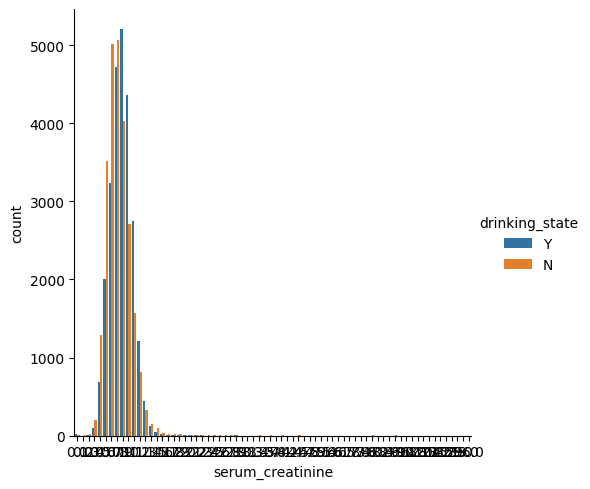

In [ ]:
sns.catplot(data=raw_data,x='serum_creatinine',hue='drinking_state',kind='count')

### 20. SGOT_AST (SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase))

In [ ]:
print(raw_data.SGOT_AST.describe())
print('-------------------------------\n')
print(raw_data.SGOT_AST[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.SGOT_AST[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean        25.989320
std         18.388035
min          1.000000
25%         19.000000
50%         23.000000
75%         28.000000
max       1540.000000
Name: SGOT_AST, dtype: float64
-------------------------------

19.0     1552
21.0     1545
20.0     1517
22.0     1481
18.0     1444
         ... 
406.0       1
148.0       1
225.0       1
446.0       1
177.0       1
Name: SGOT_AST, Length: 199, dtype: int64
-------------------------------

20.0     1755
21.0     1727
19.0     1668
22.0     1563
18.0     1555
         ... 
278.0       1
288.0       1
195.0       1
568.0       1
144.0       1
Name: SGOT_AST, Length: 151, dtype: int64


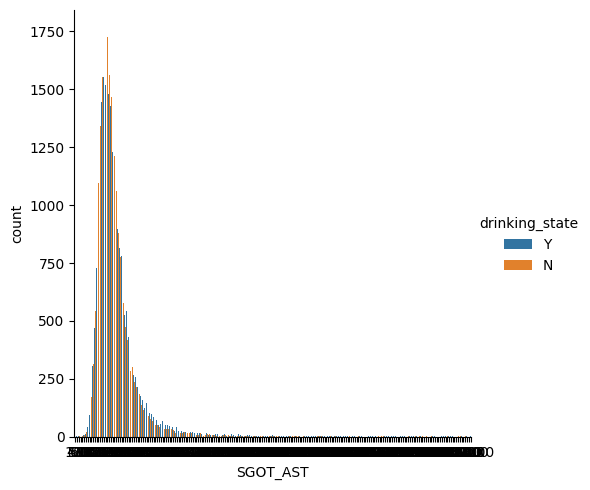

In [ ]:
sns.catplot(data=raw_data,x='SGOT_AST',hue='drinking_state',kind='count')

### 21. SGOT_ALT (SGOT(Glutamate-oxaloacetate transaminase) (ALT(Alanine transaminase))

In [ ]:
print(raw_data.SGOT_ALT.describe())
print('-------------------------------\n')
print(raw_data.SGOT_ALT[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.SGOT_ALT[raw_data.drinking_state == 'N'].value_counts())

count    50000.000000
mean        25.768480
std         25.677639
min          1.000000
25%         15.000000
50%         20.000000
75%         29.000000
max       2059.000000
Name: SGOT_ALT, dtype: float64
-------------------------------

14.0     1093
19.0     1091
15.0     1071
16.0     1056
13.0     1024
         ... 
352.0       1
389.0       1
529.0       1
169.0       1
151.0       1
Name: SGOT_ALT, Length: 224, dtype: int64
-------------------------------

15.0      1381
14.0      1304
17.0      1296
16.0      1279
13.0      1244
          ... 
313.0        1
407.0        1
466.0        1
1128.0       1
306.0        1
Name: SGOT_ALT, Length: 199, dtype: int64


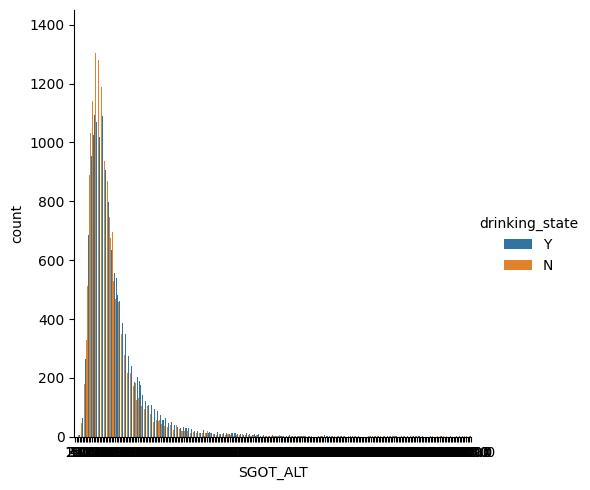

In [ ]:
sns.catplot(data=raw_data,x='SGOT_ALT',hue='drinking_state',kind='count')

### 22. Gamma_GTP (Y-glutamyl transpeptidase)

In [ ]:
print(raw_data.gamma_GTP.describe())
print('-------------------------------\n')
print(raw_data.gamma_GTP[raw_data.drinking_state == 'Y'].value_counts())
print('-------------------------------\n')
print(raw_data.gamma_GTP[raw_data.drinking_state == 'N'].value_counts())

count    50000.00000
mean        36.86760
std         49.60488
min          1.00000
25%         16.00000
50%         23.00000
75%         39.00000
max        999.00000
Name: gamma_GTP, dtype: float64
-------------------------------

16.0     763
14.0     741
17.0     739
18.0     737
20.0     719
        ... 
452.0      1
435.0      1
296.0      1
477.0      1
841.0      1
Name: gamma_GTP, Length: 454, dtype: int64
-------------------------------

15.0     1369
13.0     1362
14.0     1309
12.0     1236
16.0     1225
         ... 
129.0       1
234.0       1
283.0       1
208.0       1
842.0       1
Name: gamma_GTP, Length: 276, dtype: int64


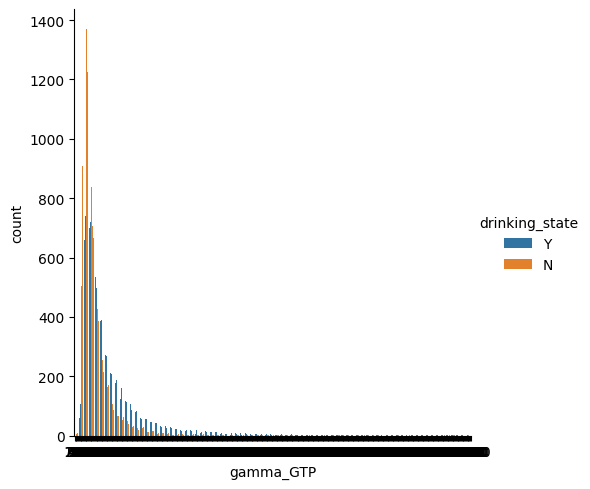

In [ ]:
sns.catplot(data=raw_data,x='gamma_GTP',hue='drinking_state',kind='count')



*   Gamma_GTP is higher in drinker than not drinker.



### 23. Smoking_state (Never, Used to smoke but quit, Still smoke)

In [ ]:
print(raw_data.smoking_state.describe())
print('-------------------------------\n')
print(raw_data.smoking_state.value_counts())

count    50000.000000
mean         1.607220
std          0.819535
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: smoking_state, dtype: float64
-------------------------------

1.0    30467
3.0    10828
2.0     8705
Name: smoking_state, dtype: int64


In [ ]:
pd.crosstab(raw_data.smoking_state,raw_data.drinking_state)

drinking_state,N,Y
smoking_state,,
1.0,19646,10821
2.0,2694,6011
3.0,2669,8159


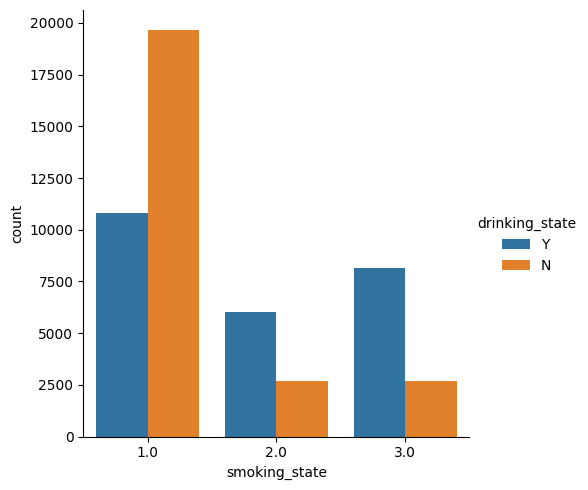

In [ ]:
sns.catplot(data=raw_data,x='smoking_state',hue='drinking_state',kind='count')



*   If they used to smoke or smoke, it is possible that thay are drinker.




**After explore data by each columns, we found information as follows.**
*   Drinker has 49.98% in dataset and is male 35.62% and female 14.36%
*   Most of drinker are between 31 to 40 years old
*   Drinker seems to have BLDS higher than not drinker (Drinker's BLDS: 92-96).
*   Some of not drinker has triglyceride higher than drinker at 82 but the rest seems to less than drinker.
*   Drinker has hemoglobin around 15 - 15.5 higher that not drinker.
*   Gamma_GTP is higher in drinker than not drinker.
*   If they used to smoke or smoke, it is possible that thay are drinker.






Next we will explore data follows assumption.

### EDA No.1: Does drinker have the over rate of SBP (more than 140) and DBP (more than 90) when compare with not drinker?

Normal rate

*   SBP [not over 140]
*   DBP [not over 90]



In [ ]:
eda1 = raw_data[['drinking_state','SBP','DBP']].copy()

# SBP should not over 140
eda1.loc[eda1['SBP'] > 140,'SBP_check'] = True
eda1.loc[eda1['SBP'] <= 140,'SBP_check'] = False

# DBP should not less than 90
eda1.loc[eda1['DBP'] > 90,'DBP_check'] = True
eda1.loc[eda1['DBP'] <= 90,'DBP_check'] = False

In [ ]:
print(pd.crosstab(eda1.drinking_state,eda1.SBP_check,margins=True))
print('---------------------------------------------------------------------------')
print(pd.crosstab(eda1.drinking_state,eda1.SBP_check,margins=True,normalize='all'))

SBP_check       False  True    All
drinking_state                    
N               22788  2221  25009
Y               23038  1953  24991
All             45826  4174  50000
---------------------------------------------------------------------------
SBP_check         False     True      All
drinking_state                           
N               0.45576  0.04442  0.50018
Y               0.46076  0.03906  0.49982
All             0.91652  0.08348  1.00000


In [ ]:
print(pd.crosstab(eda1.drinking_state,eda1.DBP_check,margins=True))
print('---------------------------------------------------------------------------')
print(pd.crosstab(eda1.drinking_state,eda1.DBP_check,margins=True,normalize='all'))

DBP_check       False  True    All
drinking_state                    
N               23907  1102  25009
Y               23376  1615  24991
All             47283  2717  50000
---------------------------------------------------------------------------
DBP_check         False     True      All
drinking_state                           
N               0.47814  0.02204  0.50018
Y               0.46752  0.03230  0.49982
All             0.94566  0.05434  1.00000




Result:  

*   Amount of drinker has the DBP rate over 90 more than amount of not drinker but when look at SBP rate over 140, amount of not drinker is higher than drinker.


### EDA No.2: Does drinker have the blood result worse than not drinker?

**- Serum_creatinine, SGOT_AST, SGOT_ALT and gamma_GTP**

Normal rate


*   serum_creatinine [male = 0.6-1.2, female = 0.5-1.1]
*   SGOT_AST [male <= 30, female <= 19]
*   SGOT_ALT [male <= 30, female <= 19]
*   gamma_GTP <br>
[male (age more than 16) = 6–38]<br>
[female (age is between 16-44)	= 4–27]<br>
[female (age more than 45) = 6–37]





In [ ]:
eda2 = raw_data.copy()

# serum_creatinine
eda2.loc[(eda2['sex'] == 'Male') & ((eda2['serum_creatinine'] < 0.6) | (eda2['serum_creatinine'] > 1.2)),'serum_creatinine_check'] = True
eda2.loc[(eda2['sex'] == 'Male') & ((eda2['serum_creatinine'] >= 0.6) & (eda2['serum_creatinine'] <= 1.2)),'serum_creatinine_check'] = False
eda2.loc[(eda2['sex'] == 'Female') & ((eda2['serum_creatinine'] < 0.5) | (eda2['serum_creatinine'] > 1.1)),'serum_creatinine_check'] = True
eda2.loc[(eda2['sex'] == 'Female') & ((eda2['serum_creatinine'] >= 0.5) & (eda2['serum_creatinine'] <= 1.1)),'serum_creatinine_check'] = False

# SGOT_AST
eda2.loc[(eda2['sex'] == 'Male') & (eda2['SGOT_AST'] <= 30),'SGOT_AST_check'] = False
eda2.loc[(eda2['sex'] == 'Male') & (eda2['SGOT_AST'] > 30),'SGOT_AST_check'] = True
eda2.loc[(eda2['sex'] == 'Female') & (eda2['SGOT_AST'] <= 19),'SGOT_AST_check'] = False
eda2.loc[(eda2['sex'] == 'Female') & (eda2['SGOT_AST'] > 19),'SGOT_AST_check'] = True

# SGOT_ALT
eda2.loc[(eda2['sex'] == 'Male') & (eda2['SGOT_ALT'] <= 30),'SGOT_ALT_check'] = False
eda2.loc[(eda2['sex'] == 'Male') & (eda2['SGOT_ALT'] > 30),'SGOT_ALT_check'] = True
eda2.loc[(eda2['sex'] == 'Female') & (eda2['SGOT_ALT'] <= 19),'SGOT_ALT_check'] = False
eda2.loc[(eda2['sex'] == 'Female') & (eda2['SGOT_ALT'] > 19),'SGOT_ALT_check'] = True

# gamma_GTP
eda2.loc[(eda2['sex'] == 'Male') & ((eda2['gamma_GTP'] >= 6) & (eda2['gamma_GTP'] <= 38)),'gamma_GTP_check'] = False
eda2.loc[(eda2['sex'] == 'Male') & ((eda2['gamma_GTP'] < 6) | (eda2['gamma_GTP'] > 38)),'gamma_GTP_check'] = True

eda2.loc[(eda2['sex'] == 'Female') & ((eda2['age'] >= 16) & (eda2['age'] <= 44)) & \
        ((eda2['serum_creatinine'] >= 4) & (eda2['serum_creatinine'] <= 27)),'gamma_GTP_check'] = False
eda2.loc[(eda2['sex'] == 'Female') & ((eda2['age'] >= 16) & (eda2['age'] <= 44)) & \
        ((eda2['serum_creatinine'] < 4) | (eda2['serum_creatinine'] > 27)),'gamma_GTP_check'] = True

eda2.loc[(eda2['sex'] == 'Female') & (eda2['age'] > 45) & \
        ((eda2['serum_creatinine'] >= 6) & (eda2['serum_creatinine'] <= 37)),'gamma_GTP_check'] = False
eda2.loc[(eda2['sex'] == 'Female') & (eda2['age'] > 45) & \
        ((eda2['serum_creatinine'] < 6) | (eda2['serum_creatinine'] > 37)),'gamma_GTP_check'] = True

**- tot_chole, LDL_chole, HDL_chole, and BLDS**

Normal rate


*   tot_chole [ <= 200 ]
*   LDL_chole [ <= 100 ]
*   HDL_chole [ >= 60 ]
*   BLDS [ <= 100 ]

In [ ]:
# tot_chole
eda2.loc[eda2['tot_chole'] > 200,'tot_chole_check'] = True
eda2.loc[eda2['tot_chole'] <= 200,'tot_chole_check'] = False

# LDL_chole
eda2.loc[eda2['LDL_chole'] > 100,'LDL_chole_check'] = True
eda2.loc[eda2['LDL_chole'] <= 100,'LDL_chole_check'] = False

# HDL_chole
eda2.loc[eda2['HDL_chole'] < 60,'HDL_chole_check'] = True
eda2.loc[eda2['HDL_chole'] >= 60,'HDL_chole_check'] = False

# BLDS
eda2.loc[eda2['BLDS'] > 100,'BLDS_check'] = True
eda2.loc[eda2['BLDS'] <= 100,'BLDS_check'] = False

**- hemoglobin**

Normal rate


*   male = 13-17
*   female = 12-15

In [ ]:
eda2.loc[(eda2['sex'] == 'Male') & ((eda2['hemoglobin'] >= 13) & (eda2['hemoglobin'] <= 17)),'hemoglobin_check'] = False
eda2.loc[(eda2['sex'] == 'Male') & ((eda2['hemoglobin'] < 13) | (eda2['hemoglobin'] > 17)),'hemoglobin_check'] = True
eda2.loc[(eda2['sex'] == 'Female') & ((eda2['hemoglobin'] >= 12) & (eda2['hemoglobin'] <= 15)),'hemoglobin_check'] = False
eda2.loc[(eda2['sex'] == 'Female') & ((eda2['hemoglobin'] < 12) | (eda2['hemoglobin'] > 15)),'hemoglobin_check'] = True

**- triglyceride**

Normal rate


*   triglyceride <= 150

In [ ]:
eda2.loc[eda2['triglyceride'] > 150,'triglyceride_check'] = True
eda2.loc[eda2['triglyceride'] <= 150,'triglyceride_check'] = False

**- Conclusion**

In [ ]:
col = list(eda2.loc[:,'serum_creatinine_check':].columns.values)
col.append('drinking_state')

summary = eda2.loc[:,col]
pd.DataFrame(summary)

,serum_creatinine_check,SGOT_AST_check,SGOT_ALT_check,gamma_GTP_check,tot_chole_check,LDL_chole_check,HDL_chole_check,BLDS_check,hemoglobin_check,triglyceride_check,drinking_state
0,False,True,False,True,False,False,False,False,False,False,Y
1,False,False,False,True,False,True,True,False,False,False,N
2,False,True,True,True,True,True,True,True,False,False,N
3,False,False,False,False,False,False,True,False,False,False,Y
4,False,False,False,True,False,False,False,True,False,False,Y
...,...,...,...,...,...,...,...,...,...,...,...
49995,True,True,True,True,True,True,False,False,False,False,N
49996,False,True,False,True,True,True,False,False,False,False,Y
49997,False,True,True,True,True,True,False,True,False,True,N
49998,False,False,False,False,True,True,True,True,False,True,Y


In [ ]:
summary_eda2 = summary.groupby('drinking_state').sum().reset_index()
summary_eda2 = summary_eda2.set_index('drinking_state').transpose().rename_axis('Variable', axis=1).reindex(columns = ['Y','N'])
summary_eda2.columns.name = None

In [ ]:
summary_eda2['compare'] = summary_eda2['Y'] - summary_eda2['N']
summary_eda2['diff_ratio'] = (summary_eda2['compare']/(summary_eda2['Y'] + summary_eda2['N'])).round(2)

In [ ]:
summary_eda2

,Y,N,compare,diff_ratio
serum_creatinine_check,878,1100,-222,-0.11
SGOT_AST_check,8603,12606,-4003,-0.19
SGOT_ALT_check,8085,8972,-887,-0.05
gamma_GTP_check,14502,16611,-2109,-0.07
tot_chole_check,10693,10338,355,0.02
LDL_chole_check,15359,15856,-497,-0.02
HDL_chole_check,15008,15626,-618,-0.02
BLDS_check,9063,8389,674,0.04
hemoglobin_check,2140,3395,-1255,-0.23
triglyceride_check,7936,5975,1961,0.14


<Axes: >

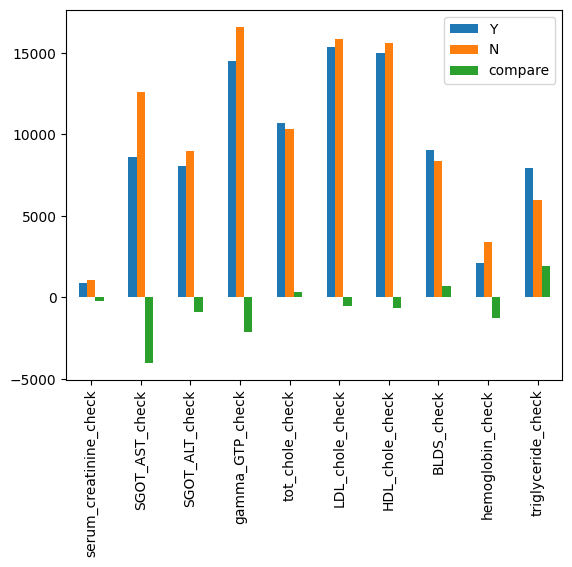

In [ ]:
summary_eda2[['Y','N','compare']].plot.bar()

Result:  

- Drinker has the rate of tot_chole, BLDS, and triglyceride higher than not drinker.

## **Build Machine Learning Model**



### Preprocess Data (Encoding)

We will encode categorical data of columns are as below to be numeric, and assign it to varaible which name is df instead


*   sex
*   hear_left
*   hear_right
*   smoking_state
*   drinking_state





In [ ]:
# replace Yes/No to 0/1
raw_data['drinking_state'] = raw_data['drinking_state'].replace("Y",1).replace("N",0)

In [ ]:
# encode data in 4 columns and will assign it into raw_data2's dataframe
# convert data type to categorical as well
en_sex = ['Male', 'Female']
en_hear_left = [1,2]
en_hear_right = [1,2]
en_smoking_state = [1,2,3]

enc = preprocessing.OneHotEncoder(categories=[en_sex, en_hear_left, en_hear_right, en_smoking_state])
enc.fit(raw_data[['sex', 'hear_left', 'hear_right', 'smoking_state']])
raw_data2 = pd.DataFrame(enc.transform(raw_data[['sex', 'hear_left', 'hear_right', 'smoking_state']]).toarray(),dtype='int64')

In [ ]:
# insert new coluumn name into dataframe which was encoded
new_col = ['sex_male','sex_female','hear_left_normal','hear_left_abnormal','hear_right_normal','hear_right_abnormal',\
           'smoking_never', 'smoking_used_to_smoke_but_quit', 'smoking_still_smoke']

a = 0
for i in range(len(raw_data2.columns)) :
  raw_data2.rename(columns = {a : new_col[i]},inplace=True)
  a+=1

In [ ]:
# remove original column from raw_data
raw_data.drop(columns = ['sex', 'hear_left', 'hear_right', 'smoking_state'],inplace=True)

In [ ]:
# reset index of 2 dataframe because we will merge it
raw_data.reset_index(inplace=True)
raw_data2.reset_index(inplace=True)

In [ ]:
# merge original data and encoded data into df's dataframe
df = raw_data.merge(raw_data2,left_index=True, right_index=True)

In [ ]:
df.drop(columns = ['index_x','index_y'],inplace=True)

In [ ]:
# convert data type to categorical instead
df['drinking_state'] = df['drinking_state'].astype('int64')

In [ ]:
print(f'Total row of original dataframe (raw_data) is: {raw_data.shape}')
print('-----------------------------------------------------------------\n')
print(f'Total row of encoded dataframe (raw_data2) is: {raw_data.shape}')
print('-----------------------------------------------------------------\n')
print(f'Total row of df dataframe is: {df.shape}')
print('-----------------------------------------------------------------\n')
print(df.head())

Total row of original dataframe (raw_data) is: (50000, 20)
-----------------------------------------------------------------

Total row of encoded dataframe (raw_data2) is: (50000, 20)
-----------------------------------------------------------------

Total row of df dataframe is: (50000, 28)
-----------------------------------------------------------------

   age  height  weight  sight_left  sight_right    SBP   DBP   BLDS  \
0   45     175      60         1.0          1.2  130.0  80.0   71.0   
1   25     160      60         1.2          1.2  120.0  82.0   74.0   
2   65     150      50         0.2          0.8  112.0  68.0  123.0   
3   40     170      60         1.5          1.2  114.0  80.0   81.0   
4   35     175      65         1.5          1.2  109.0  64.0  102.0   

   tot_chole  HDL_chole  ...  drinking_state  sex_male  sex_female  \
0      193.0       71.0  ...               1         1           0   
1      174.0       50.0  ...               0         1           0   
2 

In [ ]:
# check data type again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             50000 non-null  int64  
 1   height                          50000 non-null  int64  
 2   weight                          50000 non-null  int64  
 3   sight_left                      50000 non-null  float64
 4   sight_right                     50000 non-null  float64
 5   SBP                             50000 non-null  float64
 6   DBP                             50000 non-null  float64
 7   BLDS                            50000 non-null  float64
 8   tot_chole                       50000 non-null  float64
 9   HDL_chole                       50000 non-null  float64
 10  LDL_chole                       50000 non-null  float64
 11  triglyceride                    50000 non-null  float64
 12  hemoglobin                      

In [ ]:
df.isna().sum()

age                               0
height                            0
weight                            0
sight_left                        0
sight_right                       0
SBP                               0
DBP                               0
BLDS                              0
tot_chole                         0
HDL_chole                         0
LDL_chole                         0
triglyceride                      0
hemoglobin                        0
urine_protein                     0
serum_creatinine                  0
SGOT_AST                          0
SGOT_ALT                          0
gamma_GTP                         0
drinking_state                    0
sex_male                          0
sex_female                        0
hear_left_normal                  0
hear_left_abnormal                0
hear_right_normal                 0
hear_right_abnormal               0
smoking_never                     0
smoking_used_to_smoke_but_quit    0
smoking_still_smoke         

Now, Our data is ready for using in the next step!

### Split Data

Split data to X_train, X_test, y_train, y_test

In [ ]:
X = df.loc[:,~df.columns.isin(['drinking_state'])]
y = df['drinking_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=55)

In [ ]:
# check size of train data and test data
print(X_train.shape)
print(y_train.shape)
print('------------------------------\n')
print(X_test.shape)
print(y_test.shape)

(37500, 27)
(37500,)
------------------------------

(12500, 27)
(12500,)


### Build Model:  K-Nearest Neighbors Classification




Create pipeline which contain standard scaler and model

In [ ]:
knn_pipeline = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

Create GridSearchCV

In [ ]:
knn_param = {'knn__n_neighbors':  np.arange(1, 30, 2)}
knn_grid = GridSearchCV(knn_pipeline, param_grid=knn_param, cv=10, return_train_score=True)

Fit/Train Model

In [ ]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [ ]:
# view accuracy of train data and also best param
print(f'best mean score of train data:   {(knn_grid.best_score_).round(4)}')
print(f'best parameter:   {knn_grid.best_params_}')

best mean score of train data:   0.7127
best parameter:   {'knn__n_neighbors': 29}


Evaluate Model

In [ ]:
# score test data
knn_test_score = knn_grid.score(X_test,y_test)
knn_test_score

0.71424

In [ ]:
knn_pred = knn_grid.predict(X_test)
print(classification_report(y_test, knn_pred, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.73      0.68      0.71      6252
           1       0.70      0.74      0.72      6248

    accuracy                           0.71     12500
   macro avg       0.72      0.71      0.71     12500
weighted avg       0.72      0.71      0.71     12500



In [ ]:
knn_auc = roc_auc_score(y_test, knn_grid.predict_proba(X_test)[:, 1])
knn_auc

0.7846270755458123

### Build Model:  Logistic Regrssion

Create pipeline which contain standard scaler and model

In [ ]:
logistic_pipeline = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression(max_iter=400))])

Create GridSearchCV

In [ ]:
logistic_param = {'logistic__C':  np.logspace(-3,3,7)}
logistic_grid = GridSearchCV(logistic_pipeline , param_grid = logistic_param, cv = 10, return_train_score = True)

Fit/Train Model

In [ ]:
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=400))]),
             param_grid={'logistic__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True)

In [ ]:
# view accuracy of train data and also best param
print(f'best mean score of train data:   {(logistic_grid.best_score_).round(4)}')
print(f'best parameter:   {logistic_grid.best_params_}')

best mean score of train data:   0.7267
best parameter:   {'logistic__C': 1.0}


Evaluate Model

In [ ]:
# score test data
logistic_test_score = logistic_grid.score(X_test,y_test)
logistic_test_score

0.72096

In [ ]:
logistic_pred = logistic_grid.predict(X_test)
print(classification_report(y_test, logistic_pred , target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.72      0.73      0.72      6252
           1       0.73      0.71      0.72      6248

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500



In [ ]:
logistic_auc = roc_auc_score(y_test, logistic_grid.decision_function(X_test))
logistic_auc

0.8002939443500999

### Conclusion

Finally, we got the result of test data from both models.
<br>
Now let's see the summery table as follows!

In [ ]:
summary_score = pd.DataFrame()
summary_score['model'] = ['K-Nearest Neighbors Classification','Logistic Regrssion']
summary_score['accuracy'] = [knn_test_score,logistic_test_score]
summary_score['recell'] = [recall_score(y_test, knn_pred), recall_score(y_test, logistic_pred)]
summary_score['precision'] = [precision_score(y_test, knn_pred), precision_score(y_test, logistic_pred)]
summary_score['f1_score'] = [f1_score(y_test, knn_pred), f1_score(y_test, logistic_pred)]
summary_score['auc'] = [knn_auc, logistic_auc]
summary_score

,model,accuracy,recell,precision,f1_score,auc
0,K-Nearest Neighbors Classification,0.71424,0.744078,0.702054,0.722455,0.784627
1,Logistic Regrssion,0.72096,0.711588,0.725049,0.718255,0.800294
